### Gram-Schmidt Method

The **Gram-Schmidt method** is a process to take a set of **linearly independent vectors** and turn them into an **orthogonal (or orthonormal) set of vectors**.  

Think of it like this:  
- You start with a bunch of vectors that might be pointing in random directions.  
- You "adjust" each vector so that it becomes **perpendicular** to all the vectors you've already processed.  
- If you also make each vector have **length 1**, you get an **orthonormal set**.  

### Why is this useful?
- Orthogonal vectors are easier to work with in calculations like **projections**, **solving linear systems**, and **QR decomposition**.  
- They simplify many problems in **linear algebra** and **data science**.

### Intuition
Imagine standing in a room with several arrows pointing in different directions:  
1. Take the first arrow as it is.  
2. For the next arrow, remove the part that points in the direction of the first arrow.  
3. For the third arrow, remove the parts that point along the first two arrows.  
4. Keep going… each arrow now points in a "new direction" not overlapping with previous ones.  

Mathematically, if you have vectors \(v_1, v_2, \dots, v_n\), the orthogonal vectors \(u_1, u_2, \dots, u_n\) are computed as:

$$
\begin{aligned}
u_1 &= v_1 \\
u_2 &= v_2 - \text{proj}_{u_1}(v_2) \\
u_3 &= v_3 - \text{proj}_{u_1}(v_3) - \text{proj}_{u_2}(v_3) \\
&\vdots
\end{aligned}
$$

where the **projection** of $(v)$ onto $(u)$ is:  
$$
\text{proj}_u(v) = \frac{v \cdot u}{u \cdot u} u
$$

This way, each $(u_i)$ is **perpendicular** to all previous $(u_j)$.



### Visualizing the Parallelogram Law

This plot illustrates the **parallelogram law of vector addition**:

1. We define two vectors, `v1` and `v2`.  
2. We compute their **sum** (`v1 + v2`) and **difference** (`v1 - v2`). The difference represents the other diagonal of the parallelogram.  
3. The plot shows:
   - The original vectors (`v1` and `v2`) starting from the origin.
   - The resulting vector from their **sum**.
   - The resulting vector from their **difference**.
4. Dashed lines complete the parallelogram, helping visualize how vector addition geometrically forms the diagonal of a parallelogram.

**Takeaway:** The sum of two vectors is represented by the diagonal of the parallelogram formed by placing the vectors tail-to-tail.


In [2]:
import plotly.graph_objects as go
import numpy as np

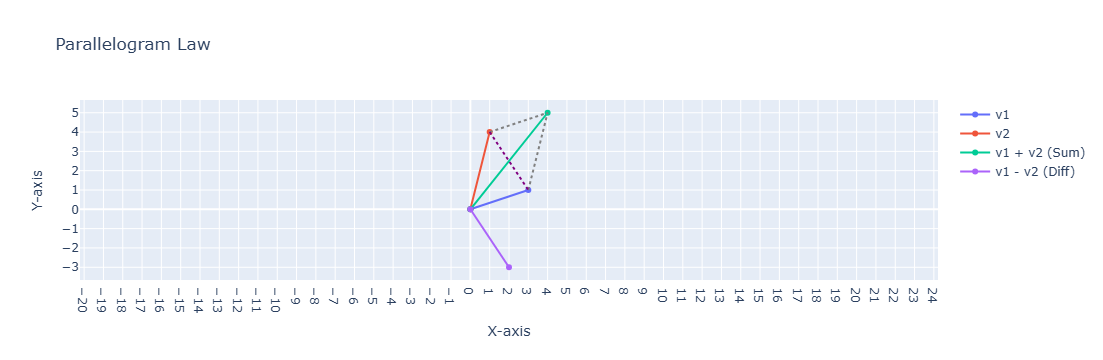

In [7]:
# 1. Define the vectors
v1 = np.array([3, 1])
v2 = np.array([1, 4])

# 2. Calculate sum and difference
v_sum = v1 + v2
v_diff = v1 - v2 # This is the other diagonal of the parallelogram

# 3. Create the plot
fig = go.Figure()

# Add the main vectors and their sum/difference
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], mode='lines+markers', name='v1'))
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], mode='lines+markers', name='v2'))
fig.add_trace(go.Scatter(x=[0, v_sum[0]], y=[0, v_sum[1]], mode='lines+markers', name='v1 + v2 (Sum)'))
fig.add_trace(go.Scatter(x=[0, v_diff[0]], y=[0, v_diff[1]], mode='lines+markers', name='v1 - v2 (Diff)'))

# Add the helper lines to complete the parallelogram for addition
fig.add_trace(go.Scatter(
    x=[v1[0], v_sum[0]], y=[v1[1], v_sum[1]],
    mode='lines', line=dict(dash='dot', color='grey'), showlegend=False
))
fig.add_trace(go.Scatter(
    x=[v2[0], v_sum[0]], y=[v2[1], v_sum[1]],
    mode='lines', line=dict(dash='dot', color='grey'), showlegend=False
))
fig.add_trace(go.Scatter(
    x=[v2[0], v1[0]], y=[v2[1], v1[1]],
    mode='lines', line=dict(dash='dot', color='purple'), showlegend=False
))

# 4. Update layout for clarity
fig.update_layout(
    title="Parallelogram Law",
    xaxis=dict(title="X-axis", dtick=1 ),
    yaxis=dict(title="Y-axis", scaleanchor="x", dtick=1 )
)

fig.show()

### Animation: Gram-Schmidt Orthogonalization

This interactive plot demonstrates the **Gram-Schmidt process** in 2D, showing how we convert a set of vectors into an **orthogonal basis**.

### Steps in the Animation:

1. **Initial Vectors**  
   We start with two vectors `u1` and `u2`.

2. **Projection**  
   We project `u2` onto `v1` (the first vector of the new orthogonal basis). This shows the part of `u2` that lies along `v1`.

3. **Subtract Projection**  
   We subtract the projection from `u2` to get `v2`, which is **orthogonal to `v1`**. The dashed lines illustrate the parallelogram formed in this subtraction.

4. **Final Orthogonal Basis**  
   The result is two vectors `v1` and `v2` that are **perpendicular** to each other. Together, they form an **orthogonal basis** for the space spanned by `u1` and `u2`.

### Key Takeaways:

- Gram-Schmidt systematically removes components along existing vectors to create orthogonal vectors.  
- This method is foundational for **QR decomposition**, **least squares**, and many applications in **linear algebra** and **data science**.  



In [ ]:
# Consider 2 vectors 
u1 = [1,1]
u2 = [1,0]
# Plot u1 and u2
v1 = u1
# Plot projection of v1 on u2
# Using paralleogram plot u2 - proj(v1)on u2


In [21]:
# --- 1. Setup and Calculations ---

# Using the same illustrative vectors
u1 = np.array([5, 3])
u2 = np.array([4, 1])

# The first vector of our new basis is just u1
v1 = u1

# Calculate the projection of u2 onto v1
dot_product = np.dot(u2, v1)
v1_mag_sq = np.dot(v1, v1)
proj_u2_on_v1 = (dot_product / v1_mag_sq) * v1

# Calculate the new orthogonal vector v2
v2 = u2 - proj_u2_on_v1


# --- 2. Create all plot components (traces) ---

fig = go.Figure()

# Add all traces to the figure
# Step 1: Initial vectors
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], mode='lines+markers', name='v1 (start)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=[0, u2[0]], y=[0, u2[1]], mode='lines+markers', name='u2 (start)', line=dict(color='green')))

# Step 2: Projection line and vector
fig.add_trace(go.Scatter(x=[u2[0], proj_u2_on_v1[0]], y=[u2[1], proj_u2_on_v1[1]], mode='lines', name='Projection Line', line=dict(color='grey', dash='dot'), visible=False))
fig.add_trace(go.Scatter(x=[0, proj_u2_on_v1[0]], y=[0, proj_u2_on_v1[1]], mode='lines+markers', name='proj(u2 on v1)', line=dict(color='red', dash='dash'), visible=False))

# Step 3: Orthogonal component (the new v2) and parallelogram
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], mode='lines+markers', name='v2 = u2 - proj', line=dict(color='purple', width=4), visible=False))
fig.add_trace(go.Scatter(x=[u2[0], v2[0]], y=[u2[1], v2[1]], mode='lines', line=dict(dash='dot', color='lightgrey'), showlegend=False, visible=False))
fig.add_trace(go.Scatter(x=[proj_u2_on_v1[0], u2[0]], y=[proj_u2_on_v1[1], u2[1]], mode='lines', line=dict(dash='dot', color='lightgrey'), showlegend=False, visible=False))

# Step 4: Final orthogonal basis
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], mode='lines+markers', name='v1 (final)', line=dict(color='blue', width=4), visible=False))
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], mode='lines+markers', name='v2 (final)', line=dict(color='purple', width=4), visible=False))


# --- 3. Define the animation frames (with v1 hidden in steps 2 & 3) ---

frames = [
    # Frame 0: Initial State
    go.Frame(name='Step 1: Initial Vectors', data=[
        go.Scatter(visible=True), go.Scatter(visible=True), # v1, u2
        go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=False), go.Scatter(visible=False)
    ]),
    # Frame 1: Show Projection (v1 is now FALSE)
    go.Frame(name='Step 2: Project u2 onto v1', data=[
        go.Scatter(visible=False), go.Scatter(visible=True), # Hide v1
        go.Scatter(visible=True), go.Scatter(visible=True),
        go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=False), go.Scatter(visible=False)
    ]),
    # Frame 2: Show Subtraction (v1 is now FALSE)
    go.Frame(name='Step 3: Find Orthogonal Component', data=[
        go.Scatter(visible=False), go.Scatter(visible=True), # Hide v1
        go.Scatter(visible=False), go.Scatter(visible=True),
        go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=True),
        go.Scatter(visible=False), go.Scatter(visible=False)
    ]),
    # Frame 3: Show Final Orthogonal Basis
    go.Frame(name='Step 4: Final Orthogonal Basis', data=[
        go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False),
        go.Scatter(visible=True), go.Scatter(visible=True) # Show final basis
    ])
]

# --- 4. Update figure with frames, slider, and new axis range ---

fig.frames = frames
fig.update_layout(
    title="Animation of Gram-Schmidt Orthogonalization",
    updatemenus=[{
        "type": "buttons", "buttons": [{"label": "Start", "method": "animate", "args": [None, {"frame": {"duration": 1500}}]}]
    }],
    sliders=[{
        "steps": [
            {"label": "Initial", "method": "animate", "args": [['Step 1: Initial Vectors']]},
            {"label": "Project", "method": "animate", "args": [['Step 2: Project u2 onto v1']]},
            {"label": "Subtract", "method": "animate", "args": [['Step 3: Find Orthogonal Component']]},
            {"label": "Final", "method": "animate", "args": [['Step 4: Final Orthogonal Basis']]}
        ]
    }],
    xaxis=dict(range=[-1, 5], dtick=1),
    # CHANGED Y-AXIS RANGE HERE
    yaxis=dict(range=[-2, 5], dtick=1, scaleanchor="x")
)

fig.show()

In [33]:
import plotly.graph_objects as go
import numpy as np

# --- 1. Setup and Calculations ---

# You can change these vectors, and the plot range will adjust automatically
u1 = np.array([1, 2])
u2 = np.array([2, 2])

v1 = u1
dot_product = np.dot(u2, v1)
v1_mag_sq = np.dot(v1, v1)
proj_u2_on_v1 = (dot_product / v1_mag_sq) * v1
v2 = u2 - proj_u2_on_v1


# --- NEW: Dynamically calculate the plot range ---
# Collect all x and y coordinates that will be plotted
all_points = np.array([
    [0, 0], # Origin
    v1,
    u2,
    proj_u2_on_v1,
    v2
])
x_coords = all_points[:, 0]
y_coords = all_points[:, 1]

# Calculate the min and max, then add padding
padding = 1.5
x_range = [min(x_coords) - padding, max(x_coords) + padding]
y_range = [min(y_coords) - padding, max(y_coords) + padding]


# --- 2. Create all plot components (traces) ---

fig = go.Figure()

# Add all traces to the figure
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], mode='lines+markers', name='v1 (start)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=[0, u2[0]], y=[0, u2[1]], mode='lines+markers', name='u2 (start)', line=dict(color='green')))
fig.add_trace(go.Scatter(x=[u2[0], proj_u2_on_v1[0]], y=[u2[1], proj_u2_on_v1[1]], mode='lines', name='Projection Line', line=dict(color='grey', dash='dot'), visible=False))
fig.add_trace(go.Scatter(x=[0, proj_u2_on_v1[0]], y=[0, proj_u2_on_v1[1]], mode='lines+markers', name='proj(u2 on v1)', line=dict(color='red', dash='dash'), visible=False))
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], mode='lines+markers', name='v2 = u2 - proj', line=dict(color='purple', width=4), visible=False))
fig.add_trace(go.Scatter(x=[u2[0], v2[0]], y=[u2[1], v2[1]], mode='lines', line=dict(dash='dot', color='lightgrey'), showlegend=False, visible=False))
fig.add_trace(go.Scatter(x=[proj_u2_on_v1[0], u2[0]], y=[proj_u2_on_v1[1], u2[1]], mode='lines', line=dict(dash='dot', color='lightgrey'), showlegend=False, visible=False))
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], mode='lines+markers', name='v1 (final)', line=dict(color='blue', width=4), visible=False))
fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], mode='lines+markers', name='v2 (final)', line=dict(color='purple', width=4), visible=False))


# --- 3. Define the animation frames ---

frames = [
    go.Frame(name='Step 1: Initial Vectors', data=[go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False)]),
    go.Frame(name='Step 2: Project u2 onto v1', data=[go.Scatter(visible=False), go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False)]),
    go.Frame(name='Step 3: Find Orthogonal Component', data=[go.Scatter(visible=False), go.Scatter(visible=True), go.Scatter(visible=False), go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=True), go.Scatter(visible=False), go.Scatter(visible=False)]),
    go.Frame(name='Step 4: Final Orthogonal Basis', data=[go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=False), go.Scatter(visible=True), go.Scatter(visible=True)])
]


# --- 4. Update figure with frames and dynamic ranges ---

fig.frames = frames
fig.update_layout(
    title="Animation of Gram-Schmidt Orthogonalization",
    updatemenus=[{
        "type": "buttons", "buttons": [{"label": "Start", "method": "animate", "args": [None, {"frame": {"duration": 1500}}]}]
    }],
    sliders=[{
        "steps": [
            {"label": "Initial", "method": "animate", "args": [['Step 1: Initial Vectors']]},
            {"label": "Project", "method": "animate", "args": [['Step 2: Project u2 onto v1']]},
            {"label": "Subtract", "method": "animate", "args": [['Step 3: Find Orthogonal Component']]},
            {"label": "Final", "method": "animate", "args": [['Step 4: Final Orthogonal Basis']]}
        ]
    }],
    # Use the calculated dynamic ranges here
    xaxis=dict(range=x_range, dtick=1),
    yaxis=dict(range=y_range, dtick=1, scaleanchor="x")
)

fig.show()

### 3D Gram-Schmidt Orthogonalization

This animation demonstrates the **Gram-Schmidt process in 3D** using three linearly independent vectors `u1`, `u2`, and `u3`. The goal is to create an **orthogonal basis** `v1`, `v2`, `v3`.

### Steps Illustrated:

1. **Initial Vectors:** `u1`, `u2`, and `u3` are plotted from the origin.  
2. **First Orthogonal Vector:** `v1` is set to `u1`.  
3. **Second Orthogonal Vector:** `u2` is projected onto `v1`, and the orthogonal component `v2 = u2 - proj(u2 on v1)` is computed.  
4. **Third Orthogonal Vector:** `u3` is projected onto the plane spanned by `v1` and `v2`. Subtracting this projection gives `v3`, orthogonal to both `v1` and `v2`.  
5. **Final Orthogonal Basis:** `v1`, `v2`, and `v3` form a complete **orthogonal basis** for the 3D space spanned by the original vectors.

### Key Features:

- **3D Visualization:** Helps students intuitively see how each vector is orthogonalized.  
- **Animation Steps:** Each frame highlights a stage of the Gram-Schmidt process.  
- **Helper Lines:** Show projections and the geometric relationships between vectors.


In [34]:
import plotly.graph_objects as go
import numpy as np

# --- 1. Setup and Calculations ---

# Start with 3 linearly independent 3D vectors
u1 = np.array([2.0, 2.0, 0.0])
u2 = np.array([3.0, 0.0, 1.0])
u3 = np.array([1.0, 2.0, 3.0])

# --- Step 1: Find v1 and v2 ---
v1 = u1
proj_u2_on_v1 = (np.dot(u2, v1) / np.dot(v1, v1)) * v1
v2 = u2 - proj_u2_on_v1

# --- Step 2: Find v3 ---
proj_u3_on_v1 = (np.dot(u3, v1) / np.dot(v1, v1)) * v1
proj_u3_on_v2 = (np.dot(u3, v2) / np.dot(v2, v2)) * v2
proj_sum = proj_u3_on_v1 + proj_u3_on_v2 # This is the projection of u3 onto the plane spanned by v1 and v2
v3 = u3 - proj_sum

# --- 2. Create All Plot Components (Traces) ---

def vector_trace(vec, name, color, dash=None, width=None):
    return go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
                       mode='lines', name=name,
                       line=dict(color=color, dash=dash, width=width or 7))

def helper_line_trace(p1, p2, color='grey'):
    return go.Scatter3d(x=[p1[0], p2[0]], y=[p1[1], p2[1]], z=[p1[2], p2[2]],
                       mode='lines', line=dict(color=color, dash='dot'), showlegend=False)

traces = []
# Initial vectors
traces.append(vector_trace(u1, 'u1', 'blue'))
traces.append(vector_trace(u2, 'u2', 'green'))
traces.append(vector_trace(u3, 'u3', 'goldenrod'))
# v1, v2 process
traces.append(vector_trace(proj_u2_on_v1, 'proj(u2 on v1)', 'red', 'dash'))
traces.append(vector_trace(v2, 'v2', 'purple'))
traces.append(helper_line_trace(u2, proj_u2_on_v1))
# v3 process
traces.append(vector_trace(proj_u3_on_v1, 'proj(u3 on v1)', 'red', 'dash'))
traces.append(vector_trace(proj_u3_on_v2, 'proj(u3 on v2)', 'orange', 'dash'))
traces.append(vector_trace(proj_sum, 'sum of projs', 'magenta', 'dash'))
traces.append(vector_trace(v3, 'v3', 'cyan'))
traces.append(helper_line_trace(u3, proj_sum))
traces.append(helper_line_trace(proj_u3_on_v1, proj_sum))
traces.append(helper_line_trace(proj_u3_on_v2, proj_sum))
# Final basis
traces.append(vector_trace(v1, 'v1 (final)', 'blue', width=10))
traces.append(vector_trace(v2, 'v2 (final)', 'purple', width=10))
traces.append(vector_trace(v3, 'v3 (final)', 'cyan', width=10))

# --- 3. Define Animation Frames ---
# Each list defines the visibility of the traces above
frame_visibility = [
    [1,1,1, 0,0,0, 0,0,0,0,0,0,0, 0,0,0], # Initial u1, u2, u3
    [1,1,0, 1,0,1, 0,0,0,0,0,0,0, 0,0,0], # Find proj(u2 on v1)
    [1,1,0, 1,1,1, 0,0,0,0,0,0,0, 0,0,0], # Find v2 = u2 - proj
    [1,0,0, 0,1,0, 0,0,0,0,0,0,0, 0,0,0], # Show v1, v2
    [1,0,1, 0,1,0, 1,1,0,0,0,0,0, 0,0,0], # Show u3 and its projections on v1, v2
    [1,0,1, 0,1,0, 1,1,1,0,0,1,1, 0,0,0], # Show sum of projections
    [1,0,1, 0,1,0, 0,0,1,1,1,0,0, 0,0,0], # Find v3 = u3 - sum_proj
    [0,0,0, 0,0,0, 0,0,0,0,0,0,0, 1,1,1], # Final Basis v1, v2, v3
]
frame_names = [
    "Initial Vectors", "Project u2 on v1", "Compute v2", "First Two Orthogonal Vectors",
    "Project u3 on v1 & v2", "Sum of Projections", "Compute v3", "Final Orthogonal Basis"
]

frames = []
for name, vis in zip(frame_names, frame_visibility):
    frames.append(go.Frame(name=name, data=[go.Scatter3d(visible=bool(v)) for v in vis]))

# --- 4. Create Figure and Layout ---
fig = go.Figure(data=traces, frames=frames)

# Set initial visibility
for i, v in enumerate(frame_visibility[0]):
    fig.data[i].visible = bool(v)

fig.update_layout(
    title="3D Gram-Schmidt Orthogonalization",
    sliders=[{
        "steps": [{"label": name, "method": "animate", "args": [[name]]} for name in frame_names]
    }],
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z'),
        aspectmode='data' # This ensures correct angles
    ),
    legend=dict(x=0, y=1)
)

fig.show()

### Intuition: Why Gram-Schmidt Makes Sense in Applications

### 1. Solving Linear Systems / Least Squares
- Original vectors (equations) may overlap or point in similar directions.  
- GS converts them into **perpendicular directions**, so each component contributes independently.  
- **Benefit:** Projections and solutions become simple scalars along independent axes, avoiding interference between equations.

### 2. Data Analysis / PCA
- Real-world features are often correlated.  
- GS (or orthogonalization) creates **uncorrelated axes**, letting you represent data along independent directions.  
- **Benefit:** Easier interpretation, dimensionality reduction, and more meaningful variance analysis.

### 3. Computer Graphics & Physics
- Coordinate frames, camera directions, and rotations require **orthogonal axes**.  
- GS ensures axes are perpendicular and independent, which is critical for consistent transformations.  
- **Benefit:** Objects move/rotate correctly without distortion or unintended scaling.


**Key Intuition:**  
Gram-Schmidt removes overlaps step by step, leaving vectors that are **mutually independent**. This independence is what makes computations, interpretations, and transformations clean, stable, and intuitive across applications.
